<h1> Fire Dispatch </h1>

<h2>Data Analysis and Visualization</h2>

In [2]:

import pandas as pd

# Declare path to "Data" folder
path = 'Data/'

# Load datasets
fire_stations = pd.read_csv(path + 'fire_stations_processed.csv')
fire_incidents = pd.read_csv(path + 'fire_incidents_processed.csv')

# print all the columns of fire_stations
print(f"fire_stations columns: {fire_stations.columns}")

# print all the columns of fire_incidents
print(f"fire_incidents columns: {fire_incidents.columns}")

# print the number of rows and columns of fire_stations
print(f"fire_stations shape: {fire_stations.shape}")

# print the number of rows and columns of fire_incidents
print(f"fire_incidents shape: {fire_incidents.shape}")

# get stations in incidents that are not in the fire_stations dataset
stations_not_in_fire_stations = fire_incidents[~fire_incidents['station_id'].isin(fire_stations['station_id'])]['station_id'].unique()
print(f"Stations not in fire_stations: {stations_not_in_fire_stations}") # these will automatically be dropped when we merge


fire_stations columns: Index(['station_id', 'station_ward', 'station_address', 'station_longitude',
       'station_latitude'],
      dtype='object')
fire_incidents columns: Index(['incident_id', 'station_id', 'ward', 'latitude', 'longitude',
       'response_time'],
      dtype='object')
fire_stations shape: (84, 5)
fire_incidents shape: (25859, 6)
Stations not in fire_stations: [424.]


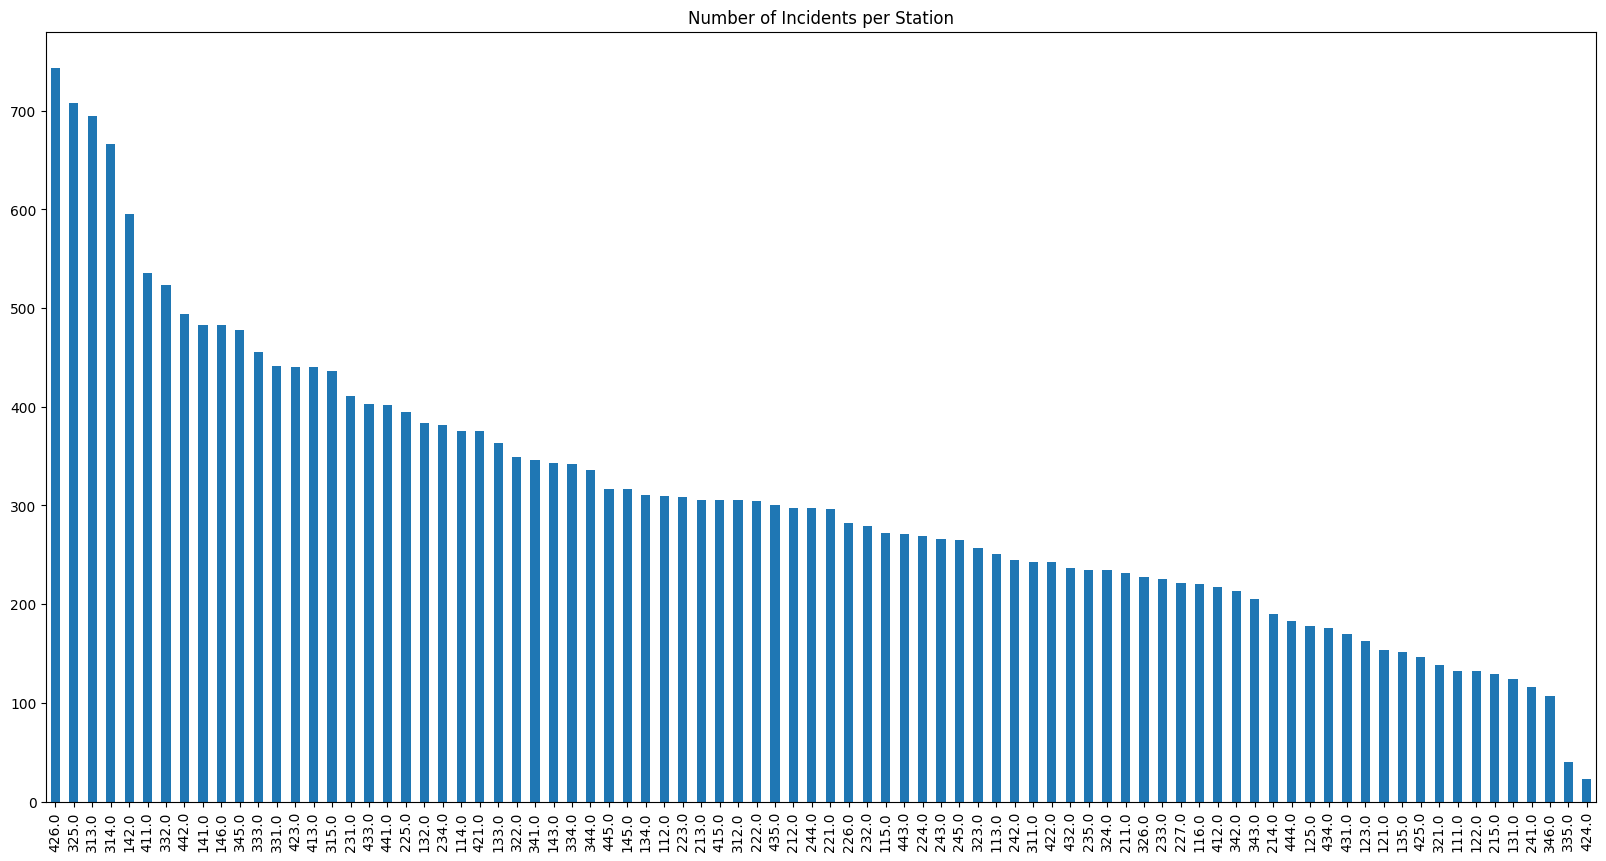

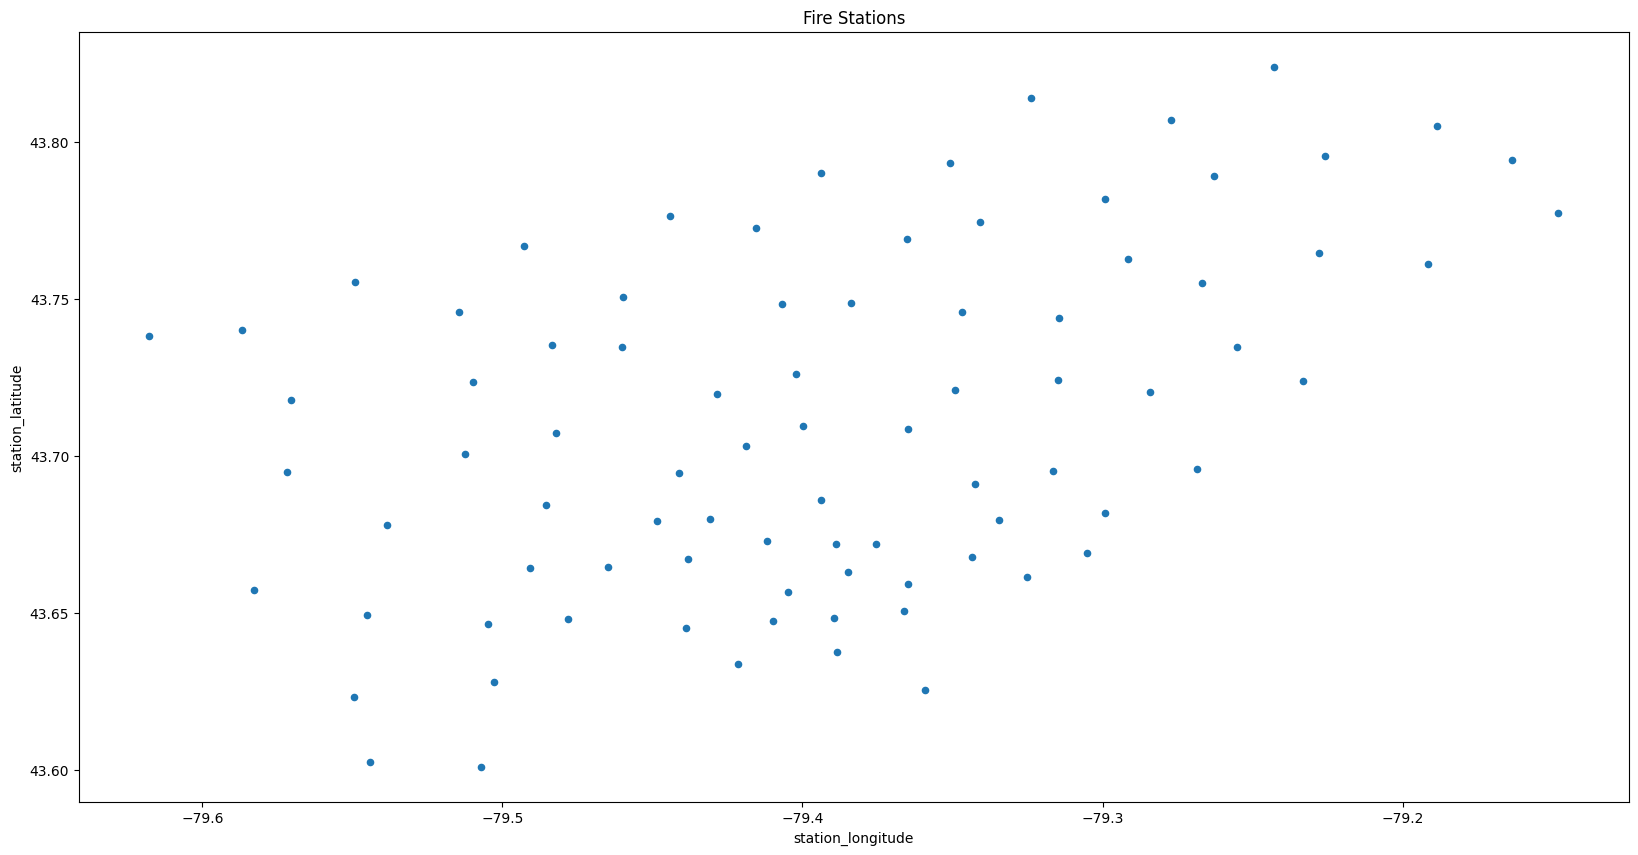

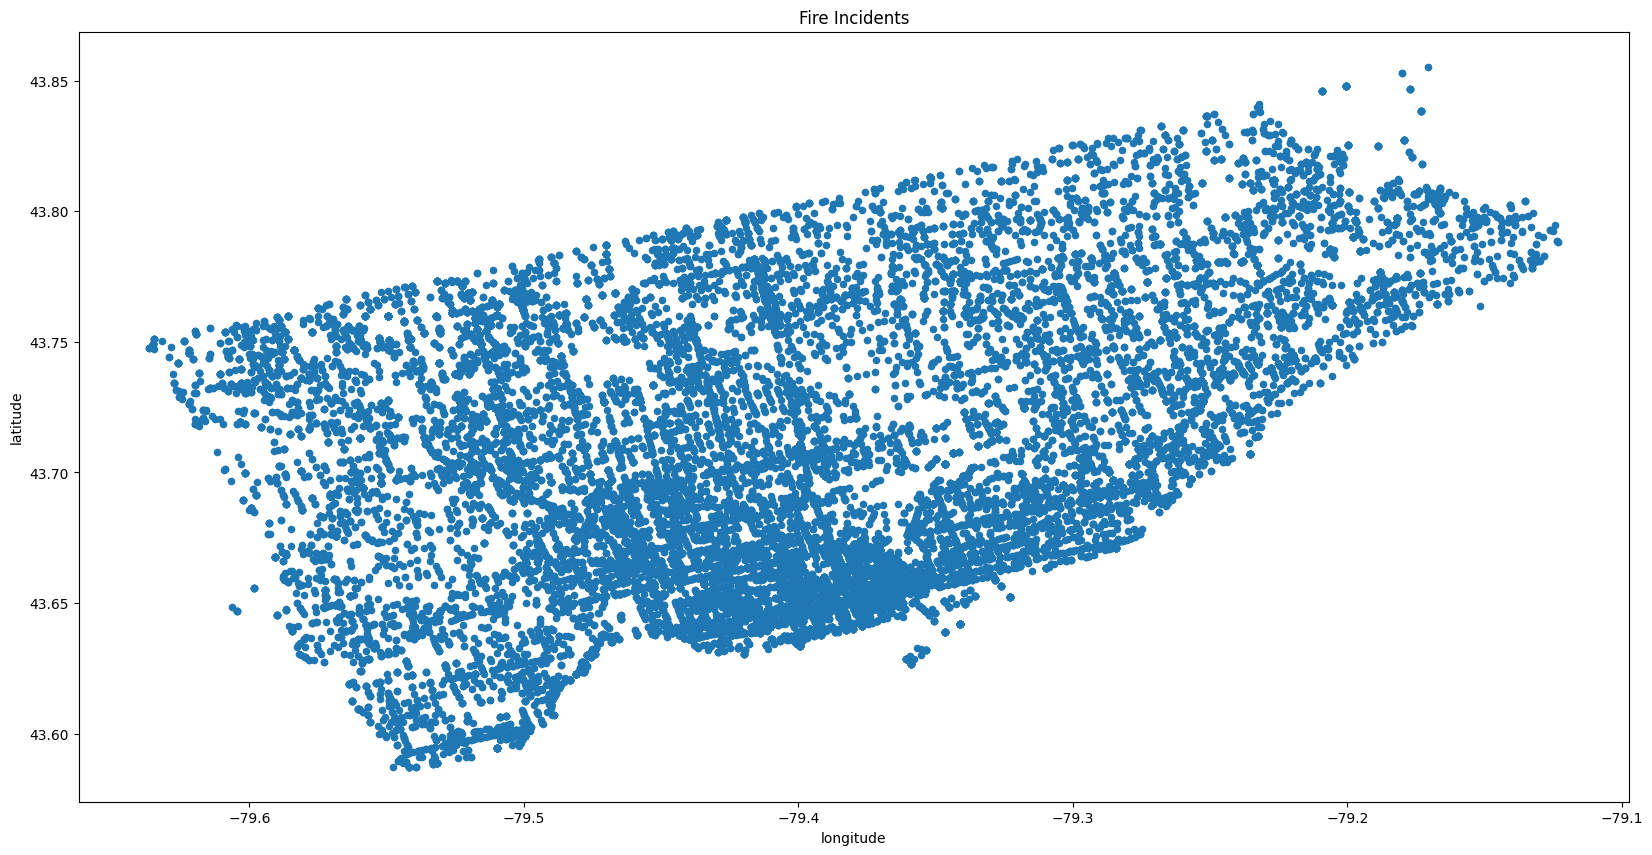

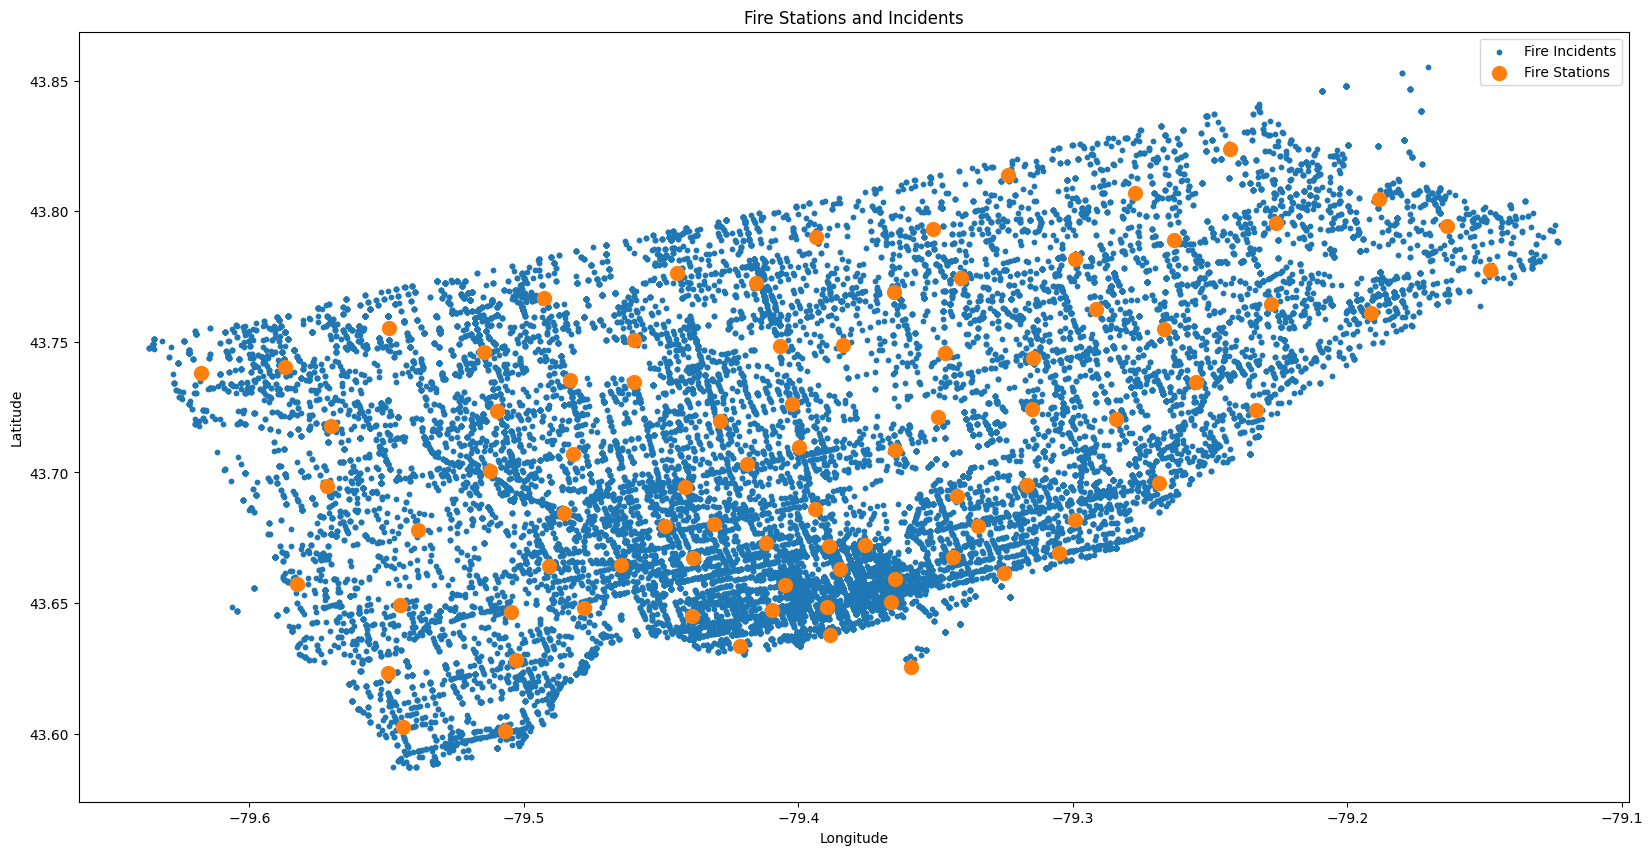

'\n# create a map of Toronto\nm = folium.Map(location=[43.6532, -79.3832], zoom_start=12)\n\n# add fire incidents to the map\nfor index, row in fire_incidents.dropna(subset=[\'latitude\', \'longitude\']).iterrows():\n    folium.CircleMarker(location=[row[\'latitude\'], row[\'longitude\']], radius=5, color=\'red\', fill=True).add_to(m)\n\n# add fire stations to the map\nfor index, row in fire_stations.dropna(subset=[\'station_latitude\', \'station_longitude\']).iterrows():\n    folium.CircleMarker(location=[row[\'station_latitude\'], row[\'station_longitude\']], radius=10, color=\'blue\', fill=True).add_to(m)\n\n# add a legend\nlegend_html = """\n     <div style="position: fixed; \n     bottom: 50px; left: 50px; width: 150px; height: 90px; \n     border:2px solid grey; z-index:9999; font-size:14px;\n     ">&nbsp; Legend <br>\n     &nbsp; Fire Incidents &nbsp; <i class="fa fa-circle fa-1x" style="color:red"></i><br>\n     &nbsp; Fire Stations &nbsp; <i class="fa fa-circle fa-1x" style="c

In [4]:
import folium
import matplotlib.pyplot as plt

# visualize the number of incidents per station
fire_incidents['station_id'].value_counts().plot(kind='bar', figsize=(20, 10), title='Number of Incidents per Station')

# visualize longitude and latitude of fire stations and incidents 
fire_stations.plot(kind='scatter', x='station_longitude', y='station_latitude', figsize=(20, 10), title='Fire Stations')
fire_incidents.plot(kind='scatter', x='longitude', y='latitude', figsize=(20, 10), title='Fire Incidents')

# visualize longitude and latitude of fire stations and incidents on the same plot with different colors (fire station bigger dots) and a legend

# create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 10))

# plot fire incidents
ax.scatter(fire_incidents['longitude'], fire_incidents['latitude'], s=10, label='Fire Incidents')

# plot fire stations
ax.scatter(fire_stations['station_longitude'], fire_stations['station_latitude'], s=100, label='Fire Stations')

# set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Fire Stations and Incidents')

# add legend
ax.legend()

# show the plot
plt.show()

# plot fire incidents and stations on a map of Toronto
'''
# create a map of Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

# add fire incidents to the map
for index, row in fire_incidents.dropna(subset=['latitude', 'longitude']).iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, color='red', fill=True).add_to(m)

# add fire stations to the map
for index, row in fire_stations.dropna(subset=['station_latitude', 'station_longitude']).iterrows():
    folium.CircleMarker(location=[row['station_latitude'], row['station_longitude']], radius=10, color='blue', fill=True).add_to(m)

# add a legend
legend_html = """
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; Legend <br>
     &nbsp; Fire Incidents &nbsp; <i class="fa fa-circle fa-1x" style="color:red"></i><br>
     &nbsp; Fire Stations &nbsp; <i class="fa fa-circle fa-1x" style="color:blue"></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))

# show the map
m
'''

In [ ]:
# Plots the incidents and stations on a map of Toronto and draws lines between incidents and their respective stations

# create a map of Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

# add fire incidents to the map
for index, row in fire_incidents.dropna(subset=['latitude', 'longitude']).iterrows():
    # find the corresponding station for this incident
    matching_stations = fire_stations[fire_stations['station_id'] == row['station_id']]
    if not matching_stations.empty:
        station = matching_stations.iloc[0]
        # add a line from the station to the incident
        folium.PolyLine(locations=[[row['latitude'], row['longitude']], [station['station_latitude'], station['station_longitude']]], color='black', weight=0.5).add_to(m)
        # add the incident to the map
        folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, color='red', fill=True).add_to(m)

# add fire stations to the map
for index, row in fire_stations.dropna(subset=['station_latitude', 'station_longitude']).iterrows():
    # add the station to the map
    folium.CircleMarker(location=[row['station_latitude'], row['station_longitude']], radius=10, color='blue', fill=True).add_to(m)

# add a legend
legend_html = """
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; Legend <br>
     &nbsp; Fire Incidents &nbsp; <i class="fa fa-circle fa-1x" style="color:red"></i><br>
     &nbsp; Fire Stations &nbsp; <i class="fa fa-circle fa-1x" style="color:blue"></i>
      </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))

# show the map
m


In [6]:

# Merge datasets on "station_id" such that for each incident, we add the corresponding station's information
fire_incidents_with_stations = fire_incidents.merge(fire_stations, on='station_id')

# length of fire_incidents_with_stations
print(len(fire_incidents_with_stations))

# filter fire_incidents_with_stations for 'ward' == 'station_ward'
fire_incidents_with_stations_and_ward = fire_incidents_with_stations[fire_incidents_with_stations['ward'] == fire_incidents_with_stations['station_ward']]
print(len(fire_incidents_with_stations_and_ward))

25836
11316


<h3>Haversine Distance Algorithm</h3>
This will be used as a feature in the model. It calculates the distance between two points on a sphere. In this case, the points are the location of the fire and the location of the fire station. The distance is calculated in kilometers.

In [5]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # apply the haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # This constant is the radius of the earth in kilometers
    return c * r


In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(coord1, coord2):
    lon1, lat1 = coord1
    lon2, lat2 = coord2
    
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # apply the haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # This constant is the radius of the earth in kilometers
    return c * r



from sklearn.neighbors import KNeighborsClassifier

# drop na and turn longitude and latitude into a float
stations_location = fire_stations[['station_longitude', 'station_latitude']].dropna().astype(float)
incidents_location = fire_incidents[['longitude', 'latitude']].dropna().astype(float)

# create a KNN classifier with k=1 and haversine distance as distance metric
knn = KNeighborsClassifier(n_neighbors=1, metric=haversine)


# fit the KNN classifier to the fire stations locations
knn.fit(stations_location[['station_longitude', 'station_latitude']], range(len(stations_location)))

# predict the closest station for each incident
closest_station = knn.predict(incidents_location[['longitude', 'latitude']])

# add the closest station to the fire incidents dataframe
fire_incidents['closest_station'] = closest_station

# visualize the number of incidents per closest station
fire_incidents.groupby('closest_station').size().plot(kind='bar', figsize=(20, 10), title='Number of Incidents per Closest Station')

